Penjelasan
Pra-pemrosesan Data:

Mengatasi data kategorikal dengan encoding menggunakan LabelEncoder.
Menstandarisasi data numerik untuk memastikan semua fitur memiliki skala yang seragam.
Membangun Model Klasifikasi:

Menggunakan algoritma Logistic Regression untuk memprediksi target (dalam hal ini adalah klasifikasi biner yang dihasilkan dari nilai median kolom target_feature).
Evaluasi Model:

Mengukur performa model dengan metrik-metrik evaluasi utama:
Akurasi: Proporsi prediksi yang benar terhadap keseluruhan data.
Presisi: Ketepatan prediksi positif terhadap total prediksi positif.
Recall: Kemampuan model menangkap semua nilai positif sebenarnya.
F1 Score: Rata-rata harmonis antara Presisi dan Recall.
AUC ROC: Mengukur kemampuan model dalam membedakan kelas positif dan negatif.
Menyajikan visualisasi:
Confusion Matrix: Tabel untuk melihat distribusi prediksi benar dan salah.
ROC Curve: Grafik hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).

Confusion Matrix Heatmap: Memberikan visualisasi distribusi prediksi model.
ROC Curve Visualization: Menampilkan kurva ROC berdasarkan TPR dan FPR.
Classification Report: Memberikan metrik lengkap untuk setiap kelas.

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB
None

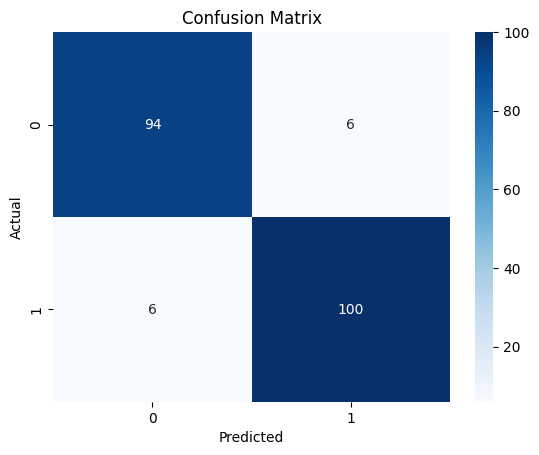

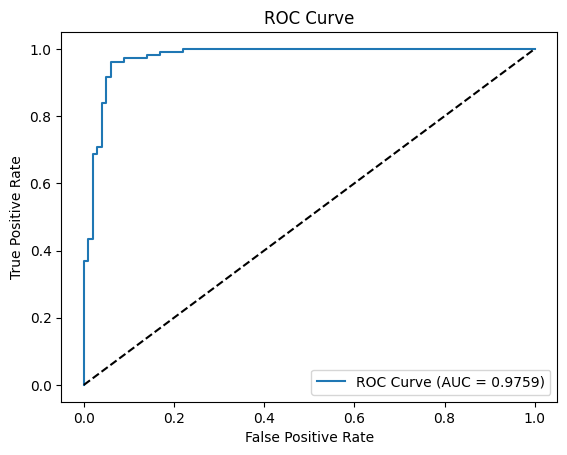


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.94      0.94      0.94       106

    accuracy                           0.94       206
   macro avg       0.94      0.94      0.94       206
weighted avg       0.94      0.94      0.94       206



In [4]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'MaterialStrength.csv'
data = pd.read_csv(file_path)

# Menampilkan informasi dataset
print("Info Dataset:")
print(data.info())
print("\nStatistik Deskriptif Dataset:")
print(data.describe())

# Menambahkan kolom target sebagai klasifikasi biner berdasarkan threshold
threshold = data['target_feature'].median()  # Menggunakan median sebagai pembatas
data['target'] = (data['target_feature'] > threshold).astype(int)

# Pisahkan fitur dan target
X = data.drop(['target', 'target_feature'], axis=1)
y = data['target']

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi kolom bertipe object
categorical_columns = X.select_dtypes(include=['object']).columns

# Tampilkan kolom-kolom kategorikal
print(f"Kolom kategorikal: {categorical_columns.tolist()}")

# Encoding kolom kategorikal menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Pastikan semua kolom numerik sebelum standarisasi
X = X.select_dtypes(include=[np.number])

# Lanjutkan ke proses pembagian data, standarisasi, dan model seperti sebelumnya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Proses pelatihan model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluasi tetap sama seperti sebelumnya
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nEvaluasi Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Evaluasi tetap sama seperti sebelumnya
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nEvaluasi Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

